# 신경망 학습

## 단순한 신경망 구현 : Logic Gate

### 필요한 모듈 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

### 하이퍼 파라미터(Hyper Parameter)

In [2]:
epochs = 1000
lr = 0.1

### 유틸 함수들(Util Functions)

In [58]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def mean_sqaured_error(pred_y,true_y):
    return 0.5*(np.sum(true_y - pred_y)**2)

def cross_entropy_error(pred_y,true_y):
    if true_y.ndim ==1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
        
    delta = 1e-7
    return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_batch(pred_y,true_y):
    if true_y.ndim ==1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
        
    delta = 1e-7
    batch_size = pred_y.shape[0]
    return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y,true_y):
    return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

def differential(f,x):
    eps = 1e-5
    diff_value = np.zeros_like(x)
    
    for i in range(x.shape[0]):
        temp_val = x[i]
        
        x[i] = temp_val + eps
        f_h1 = f(x)
        
        x[i] = temp_val - eps
        f_h2 = f(x)
        
        diff_value[i] = (f_h1 - f_h2) / (2 * eps)
        
    return diff_value


### 신경망

In [14]:
class LogicGateNet():
    
    def __init__(self):
        def weight_init():
            np.random.seed(1)
            weights = np.random.randn(2)
            bias = np.random.rand(1)
            
            return weights, bias
        
        self.weights, self.bias = weight_init()
        
    def predict(self,x):
        W = self.weights.reshape(-1,1)
        b = self.bias
        
        pred_y = sigmoid(np.dot(x,W)+b)
        return pred_y
    
    def loss(self,x,true_y) : 
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y,true_y)
    
    def get_gradient(self,x,t):
        def loss_grad(grad):
            return self.loss(x,t)
        
        grad_W = differential(loss_grad,self.weights)
        grad_B = differential(loss_grad,self.bias)
        
        return grad_W, grad_B

### AND Gate

#### 모델 생성 및 학습

In [16]:
AND = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[0],[0],[1]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = AND.get_gradient(X,Y)
    
    AND.weights -= lr*grad_W
    AND.bias -= lr*grad_B
    
    loss = AND.loss(X,Y)
    train_loss_list.append(loss)
    
    if i%100 == 99:
        print('Epochs : {}, Cost : {}, Weights : {}, Bias : {}'.format(i+1,loss,AND.weights,AND.bias))

Epochs : 100, Cost : 0.688698762848581, Weights : [1.56402489 0.79138771], Bias : [-2.14869146]
Epochs : 200, Cost : 0.49469228023287937, Weights : [2.01325161 1.71200974], Bias : [-3.07879437]
Epochs : 300, Cost : 0.3920743574674553, Weights : [2.42795372 2.29704769], Bias : [-3.79078865]
Epochs : 400, Cost : 0.32578054730528827, Weights : [2.79428901 2.73178113], Bias : [-4.37224115]
Epochs : 500, Cost : 0.2786958490607927, Weights : [3.11570431 3.08342195], Bias : [-4.86530315]
Epochs : 600, Cost : 0.2433452078259117, Weights : [3.39940551 3.38161091], Bias : [-5.29385366]
Epochs : 700, Cost : 0.2157856000923872, Weights : [3.65216893 3.64181093], Bias : [-5.67294341]
Epochs : 800, Cost : 0.1936925965494669, Weights : [3.87951811 3.87320526], Bias : [-6.01277885]
Epochs : 900, Cost : 0.17559210643186707, Weights : [4.08579293 4.08179208], Bias : [-6.32065064]
Epochs : 1000, Cost : 0.1604990115651228, Weights : [4.27438859 4.27176665], Bias : [-6.60197109]


#### 테스트

In [17]:
print(AND.predict(X))

[[0.00135585]
 [0.08865214]
 [0.08886421]
 [0.8748111 ]]


### OR Gate

#### 모델 생성 및 학습

In [19]:
OR = LogicGateNet()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_2 = np.array([[0],[1],[1],[1]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = OR.get_gradient(X,Y_2)
    
    OR.weights -= lr*grad_W
    OR.bias -= lr * grad_B
    
    loss = OR.loss(X,Y_2)
    train_loss_list.append(loss)
    
    if i % 100 ==99:
        print('Epochs : {}, Cost : {}, Weights : {}, Bias : {}'.format(i+1,loss,OR.weights,OR.bias))

Epochs : 100, Cost : 0.4958958049623752, Weights : [2.45419153 1.40520415], Bias : [-0.14450602]
Epochs : 200, Cost : 0.33999100523067505, Weights : [2.98517793 2.39365315], Bias : [-0.67661248]
Epochs : 300, Cost : 0.25747786836175185, Weights : [3.44860944 3.08310291], Bias : [-1.03712038]
Epochs : 400, Cost : 0.20645212636477486, Weights : [3.85036309 3.60706913], Bias : [-1.30581039]
Epochs : 500, Cost : 0.17181024582424712, Weights : [4.19965722 4.02803989], Bias : [-1.5203541]
Epochs : 600, Cost : 0.14680779380953535, Weights : [4.50602003 4.37937212], Bias : [-1.69913028]
Epochs : 700, Cost : 0.12795648395806816, Weights : [4.77748492 4.68063256], Bias : [-1.85239584]
Epochs : 800, Cost : 0.11326452414388091, Weights : [5.02041415 4.94419703], Bias : [-1.9864936]
Epochs : 900, Cost : 0.10151135599403104, Weights : [5.23976713 5.17836955], Bias : [-2.10564229]
Epochs : 1000, Cost : 0.09190796448433676, Weights : [5.43941599 5.38898714], Bias : [-2.21280016]


#### 테스트

In [20]:
print(OR.predict(X))

[[0.0986069 ]
 [0.95992825]
 [0.96182368]
 [0.99981878]]


### NAND Gate

#### 모델 생성 및 학습

In [22]:
NAND = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_3 = np.array([[1],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = NAND.get_gradient(X,Y_3)
    
    NAND.weights -= lr*grad_W
    NAND.bias -= lr*grad_B
    
    loss = NAND.loss(X,Y_3)
    train_loss_list.append(loss)
    
    if i%100 == 99:
        print('Epochs : {}, Cost : {}, Weights : {}, Bias : {}'.format(i+1,loss,NAND.weights,NAND.bias))

Epochs : 100, Cost : 0.7911124259392776, Weights : [-0.49003662 -1.25822733], Bias : [1.74569496]
Epochs : 200, Cost : 0.5429873559704227, Weights : [-1.51585766 -1.80296112], Bias : [2.79167048]
Epochs : 300, Cost : 0.42119746569927824, Weights : [-2.14663639 -2.26687089], Bias : [3.56530812]
Epochs : 400, Cost : 0.3455498971541896, Weights : [-2.60790032 -2.66357416], Bias : [4.18554164]
Epochs : 500, Cost : 0.2930680097157151, Weights : [-2.97762276 -3.00565182], Bias : [4.70569391]
Epochs : 600, Cost : 0.2542779422995727, Weights : [-3.28924936 -3.30437381], Bias : [5.1544371]
Epochs : 700, Cost : 0.22437768084560283, Weights : [-3.55994902 -3.56859574], Bias : [5.54924485]
Epochs : 800, Cost : 0.2006150644390317, Weights : [-3.79981845 -3.8050078 ], Bias : [5.90170075]
Epochs : 900, Cost : 0.18128040519844302, Weights : [-4.01540776 -4.01865291], Bias : [6.21994667]
Epochs : 1000, Cost : 0.16524895981022322, Weights : [-4.21127349 -4.21337527], Bias : [6.50995438]


#### 테스트

In [23]:
print(NAND.predict(X))

[[0.99851366]
 [0.90859333]
 [0.90876773]
 [0.12845438]]


### XOR Gate

#### 모델 생성 및 학습

In [25]:
XOR = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_4 = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = NAND.get_gradient(X,Y_4)
    
    XOR.weights -= lr*grad_W
    XOR.bias -= lr*grad_B
    
    loss = XOR.loss(X,Y_4)
    train_loss_list.append(loss)
    
    if i%100 == 99:
        print('Epochs : {}, Cost : {}, Weights : {}, Bias : {}'.format(i+1,loss,XOR.weights,XOR.bias))

Epochs : 100, Cost : 4.431257974158265, Weights : [ 1.43950113 -0.7957223 ], Bias : [-4.71982194]
Epochs : 200, Cost : 9.296669729491885, Weights : [ 1.25716291 -0.97718078], Bias : [-9.43641295]
Epochs : 300, Cost : 14.189064482467835, Weights : [ 1.0773283  -1.15613421], Bias : [-14.14965967]
Epochs : 400, Cost : 19.075858143100383, Weights : [ 0.89999495 -1.33258498], Bias : [-18.85956311]
Epochs : 500, Cost : 23.95681174020937, Weights : [ 0.72516048 -1.50653544], Bias : [-23.56612426]
Epochs : 600, Cost : 28.83192680659834, Weights : [ 0.55282254 -1.67798794], Bias : [-28.26934411]
Epochs : 700, Cost : 33.70120665498155, Weights : [ 0.38297878 -1.84694485], Bias : [-32.96922362]
Epochs : 800, Cost : 38.56465459900839, Weights : [ 0.21562685 -2.01340849], Bias : [-37.66576378]
Epochs : 900, Cost : 43.42227393616585, Weights : [ 0.05076442 -2.17738122], Bias : [-42.35896554]
Epochs : 1000, Cost : 48.2740679485851, Weights : [-0.11161085 -2.33886535], Bias : [-47.04882985]


#### 테스트

In [26]:
print(XOR.predict(X))

[[3.68937513e-21]
 [3.55792264e-22]
 [3.29974851e-21]
 [3.18217841e-22]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [27]:
X = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_5 = np.array([[0],[1],[1],[0]])

s1 = NAND.predict(X)
s2 = OR.predict(X)
X_2 = np.array([s1,s2]).T.reshape(-1,2)

#### 테스트

In [29]:
print(AND.predict(X_2))

[[0.12866955]
 [0.79963082]
 [0.79820836]
 [0.14232337]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [38]:
class XORNet():
    
    def __init__(self):
        np.random.seed(1)
        
        def weight_init():
            params = {}
            params['w_1'] = np.random.randn(2)
            params['b_1'] = np.random.randn(2)
            params['w_2'] = np.random.randn(2)
            params['b_2'] = np.random.randn(1)
            return params
        self.params = weight_init()
    
    def predict(self, x):
        W_1, W_2 = self.params['w_1'].reshape(-1,1), self.params['w_2'].reshape(-1,1)
        B_1, B_2 = self.params['b_1'], self.params['b_2']
        
        A1 = np.dot(x,W_1) + B_1
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1,W_2) + B_2
        pred_y = sigmoid(A2)
        
        return pred_y
    
    def loss(self,x,true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y,true_y)
    
    def get_gredient(self,x,t):
        def loss_grad(grad):
            return self.loss(x,t)
        
        grads = {}
        grads['w_1'] = differential(loss_grad, self.params['w_1'])
        grads['b_1'] = differential(loss_grad, self.params['b_1'])
        grads['w_2'] = differential(loss_grad, self.params['w_2'])
        grads['b_2'] = differential(loss_grad, self.params['b_2'])
        
        return grads

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [32]:
lr = 0.3

#### 모델 생성 및 학습

In [39]:
XOR = XORNet()
X = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_5 = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
    grads = XOR.get_gredient(X, Y_5)
    
    for key in ('w_1','b_1','w_2','b_2'):
        XOR.params[key] -= lr * grads[key]
        
    loss = XOR.loss(X,Y_5)
    train_loss_list.append(loss)
    
    if i%100 == 99:
        print('Epochs : {}, Cost :{}'.format(i+1,loss))

Epochs : 100, Cost :1.204060137701698
Epochs : 200, Cost :0.4857492147473586
Epochs : 300, Cost :0.2262541169740775
Epochs : 400, Cost :0.1394234329457147
Epochs : 500, Cost :0.09909684431175998
Epochs : 600, Cost :0.07633994334959313
Epochs : 700, Cost :0.06187000829415946
Epochs : 800, Cost :0.051909765754294006
Epochs : 900, Cost :0.04465741332436132
Epochs : 1000, Cost :0.039151526245594565


#### 테스트

In [40]:
print(XOR.predict(X))

[[0.01738781]
 [0.98277588]
 [0.97448016]
 [0.01738411]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST 

#### 필요한 모듈 임포트

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm

#### 데이터 로드

In [42]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 데이터 확인

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


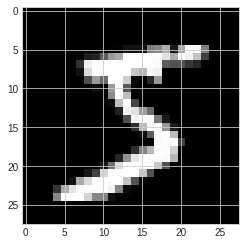

In [44]:
img = x_train[0]
print(img.shape)

plt.imshow(img,cmap='gray')
plt.show()

In [45]:
y_train[0]

5

#### 데이터 전처리 (Data Preprocessing)

In [46]:
def flatten_for_mnist(x):
    temp = np.zeros((x.shape[0],x[0].size))
    
    for idx, data in enumerate(x):
        temp[idx, : ] = data.flatten()
        
    return temp

In [47]:
x_train, x_test = x_train / 255, x_test / 255

x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

y_train_ohe = tf.one_hot(y_train, depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [49]:
print(x_train[0].max(),x_train[0].min())
print(y_train_ohe[0])

1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 하이퍼 파라미터(Hyper Parameter)

In [50]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

#### 사용되는 함수들(Util Functions)

In [60]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def mean_sqaured_error(pred_y,true_y):
    return 0.5*(np.sum(true_y - pred_y)**2)

def cross_entropy_error(pred_y,true_y):
    if true_y.ndim ==1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
        
    delta = 1e-7
    return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_batch(pred_y,true_y):
    if true_y.ndim ==1:
        true_y = true_y.reshape(1,-1)
        pred_y = pred_y.reshape(1,-1)
        
    delta = 1e-7
    batch_size = pred_y.shape[0]
    return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y,true_y):
    return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

def differential_1d(f,x):
    
    eps = 1e-5
    diff_value = np.zeros_like(x)
    
    
    
    for i in range(x.shape[0]):
        temp_val = x[i]
        
        x[i] = temp_val + eps
        f_h1 = f(x)
        
        x[i] = temp_val - eps
        f_h2 = f(x)
        
        diff_value[i] = (f_h1 - f_h2) / (2 * eps)
        
    return diff_value

def differential_2d(f,X):
    if X.ndim == 1:
        return differential_1d(f,X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = differential_1d(f,x)
        
        return grad

#### 2층 신경망으로 구현

In [61]:
class MyModel():
    
    def __init__(self):
        
        def weight_init(input_nodes,hidden_nodes,output_units):
            np.random.seed(777)
            
            params = {}
            params['w_1'] = 0.01 * np.random.randn(input_nodes,hidden_nodes)
            params['b_1'] = np.zeros(hidden_nodes)
            params['w_2'] = 0.01 * np.random.randn(hidden_nodes, output_units)
            params['b_2'] = np.zeros(output_units)
            return params
        
        self.params = weight_init(784, 64, 10)
    
    def predict(self, x):
        W_1, W_2 = self.params['w_1'], self.params['w_2']
        B_1, B_2 = self.params['b_1'], self.params['b_2']
        
        A1 = np.dot(x,W_1) + B_1
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1,W_2) + B_2
        pred_y = softmax(A2)
        
        return pred_y
    
    def loss(self,x,true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y,true_y)
    
    def accuracy(self, x, true_y):
        pred_y = self.predict(x)
        y_argmax = np.argmax(pred_y, axis=1)
        t_argmax = np.argmax(true_y, axis=1)
        
        accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])
        
        return accuracy
    
    def get_gradient(self,x,t):
        def loss_grad(grad):
            return self.loss(x,t)
        
        grads = {}
        grads['w_1'] = differential_2d(loss_grad, self.params['w_1'])
        grads['b_1'] = differential_2d(loss_grad, self.params['b_1'])
        grads['w_2'] = differential_2d(loss_grad, self.params['w_2'])
        grads['b_2'] = differential_2d(loss_grad, self.params['b_2'])
        
        return grads

#### 모델 생성 및 학습
- 시간 많이 소요

In [62]:
model = MyModel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()
for i in tqdm(range(epochs)):
    
    batch_idx = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_idx]
    y_batch = y_train_ohe[batch_idx]
                
    grads = model.get_gradient(x_batch,y_batch)
    
    for key in grads.keys():
        model.params[key] -= lr * grads[key]
        
    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    
    train_accuracy = model.accuracy(x_train, y_train_ohe)
    test_accuracy = model.accuracy(x_test, y_test_ohe)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    
    print('Epochs : {}, Cost : {}, Train Accuracy : {}, Test Accuracy : {}'.format(i+1, loss, train_accuracy, 
                                                                                  test_accuracy))
    
end_time = time.time()

print('총 학습시간 : {:.3f}s '.format(end_time - start_time))

  0%|          | 0/2 [00:00<?, ?it/s]

Epochs : 1, Cost : 465.7337030177362, Train Accuracy : 0.10441666666666667, Test Accuracy : 0.1028
Epochs : 2, Cost : 361.8357552598185, Train Accuracy : 0.09751666666666667, Test Accuracy : 0.0974
총 학습시간 : 245.949s 


### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재